In [4]:
import matplotlib

from matplotlib.animation import FuncAnimation
import pandas as pd
import matplotlib.pyplot as plt

matplotlib.use('Qt5Agg')

DATA_PATH = "C:\\Users\\gaoch\\MA\\Badminton weights\\cuts\\"

extra_path = "P1\\"
position_recording_0 = pd.read_csv(DATA_PATH + extra_path + "position.csv")[2600:2850]
velocity_recording_0 = pd.read_csv(DATA_PATH + extra_path + "velocity.csv")[2600:2850]
angular_velocity_recording_0 = pd.read_csv(DATA_PATH + extra_path + "angular_velocity.csv")[2600:2850] / 10
acceleration_recording_0 = pd.read_csv(DATA_PATH + extra_path + "acceleration.csv")[2600:2850] / 10

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from constants import *
import numpy as np


class AnimatedScatter(object):
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""

    def __init__(self, numpoints=3):
        self.numpoints = numpoints

        # xpoints = np.array([0, 6])
        # ypoints = np.array([0, 100])
        #
        # plt.subplot(1, 2, 1)
        # plt.plot(xpoints,ypoints)
        # plt.title("plot 1")
        #
        # #plot 2:
        # x = np.array([1, 2, 3, 4])
        # y = np.array([1, 4, 9, 16])
        #
        # plt.subplot(1, 2, 2)
        # plt.plot(x,y)
        # plt.title("plot 2")
        #
        # self.fig = plt.figure(1,2,2)

        self.fig = plt.figure()


        self.ax = self.fig.add_subplot(1,2,1,projection="3d")
        self.ax_0 =self.fig.add_subplot(1,2,2)
        self.ax_0.set_aspect(1)
        self.ax_0.set_axis_off()
        self.ax_0.set_xlim(-1,1)
        self.ax_0.set_ylim(-1,1)

        self.ax.set(xlim3d=(-10, 10), xlabel='X')
        self.ax.set(ylim3d=(-10, 10), ylabel='Y')
        self.ax.set(zlim3d=(-10, 10), zlabel='Z')
        # Then setup FuncAnimation.
        self.ani = animation.FuncAnimation(self.fig, self.update, interval=5)


        joint_positions = np.array(HEATMAP_JOINT_POSITION)
        self.scat = self.ax_0.scatter(joint_positions[:, 0], joint_positions[:, 1], s=200,
                                       vmin=0, vmax=1, c=np.zeros(len(HEATMAP_JOINT_POSITION)), cmap="Reds",
                                       alpha=1)


        #self.scat = self.ax_0.scatter([0, 0.3], [0, 0.3], c=c, s=40, vmin=0, vmax=2, cmap="gist_heat", alpha = 1)

    # def data_stream(self):
    #     """Generate a random walk (brownian motion). Data is scaled to produce
    #     a soft "flickering" effect."""
    #     xy = (np.random.random((self.numpoints, 2))-0.5)*10
    #     s, c = np.random.random((self.numpoints, 2)).T
    #     while True:
    #         xy += 0.03 * (np.random.random((self.numpoints, 2)) - 0.5)
    #         s += 0.05 * (np.random.random(self.numpoints) - 0.5)
    #         c += 0.02 * (np.random.random(self.numpoints) - 0.5)
    #         yield np.c_[xy[:,0], xy[:,1], s, c]

    def update(self, i):
        """Update the scatter plot."""
        #data = next(self.stream)

        # Set x and y data...
        #self.scat.set_offsets(data[:, :2])
        # Set sizes...
        #self.scat.set_sizes(300 * abs(data[:, 2])**1.5 + 100)
        # Set colors..
        self.scat.set_array(np.array([i * 0.003, 0.5, 0]))

        # We need to return the updated artist for FuncAnimation to draw..
        # Note that it expects a sequence of artists, thus the trailing comma.


a = AnimatedScatter()
plt.show()

In [11]:
from constants import *
import pandas as pd
import numpy as np
def color_stream():
    for i in range(10):
        yield i
cc = color_stream()
print(next(cc))

0


'<video width="640" height="480" controls autoplay loop>\n  <source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAMJttZGF0AAACoAYF//+c\n3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MSAtIEguMjY0L01QRUctNCBBVkMgY29kZWMg\nLSBDb3B5bGVmdCAyMDAzLTIwMjAgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwg\nLSBvcHRpb25zOiBjYWJhYz0xIHJlZj0zIGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMg\nbWU9aGV4IHN1Ym1lPTcgcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5n\nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTEgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEg\nZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xNSBsb29rYWhlYWRfdGhy\nZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVy\nYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9h\nZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBr\nZXlpbnQ9MjUwIGtleWludF9taW49NSBzY2VuZWN1dD00MCBpbnRyYV9yZWZyZXNoPTAgcmNfbG9v\na2FoZWFkPTQwIHJjPWNyZiBtYnRyZW

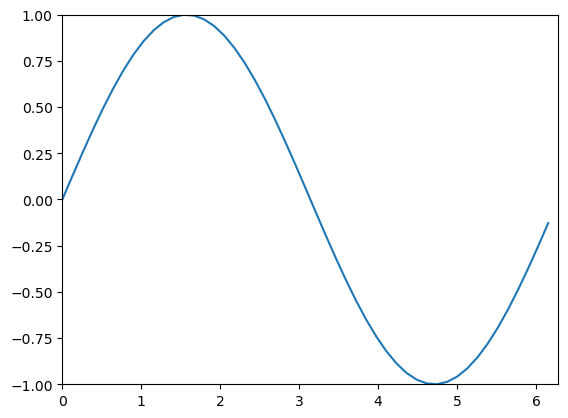

In [5]:
from flask import Flask
from matplotlib.figure import Figure
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from constants import *
from io import BytesIO
import base64






<function matplotlib.pyplot.show(close=None, block=None)>

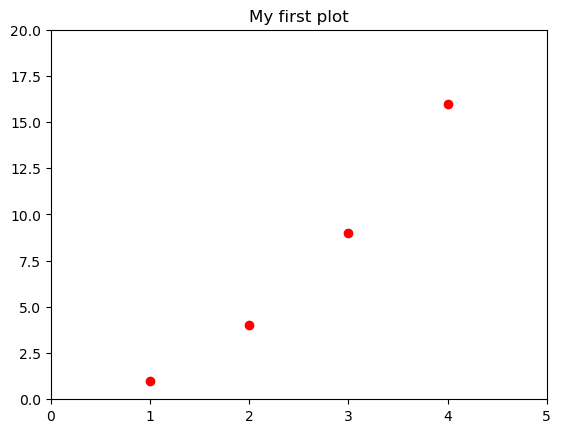

In [15]:

import matplotlib.pyplot as plt
plt.axis([0, 5, 0, 20])  # [xmin,xmax,ymin,ymax]对应轴的范围
plt.title('My first plot')  # 图名
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')  # 图上的点,最后一个参数为显示的模式
plt.show

RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request.  Consult the documentation on testing for
information about how to avoid this problem.